<img
src="https://www.imt-atlantique.fr/sites/default/files/Images/Ecole/charte-graphique/IMT_Atlantique_logo_RVB_Baseline_400x272.jpg"
WIDTH=200 HEIGHT=200>



<CENTER>
</br>
<p><font size="5"> TAF MCE </span></p>
<p><font size="4">  UE Numerical Methods </font></p>
<p></p>
<p><font size="5">  Lab - JuliaOpt: Julia optimization libraries</font></p>
<p><font size="4">  By Kevin Michalewicz </font></p>
</p></br>
</p>
</CENTER>

---------------------------

# <span style="color:#00B8DE"> I - Symbolic computation for optimization with Sympy</span>

Sympy is a Python library for symbolic computation that can be interfaced simply with Julia. It can be used when possible to get closed form solution of optimization problems. Inside Julia, additional Julia syntaxes can be used to work with Sympy.

## Refs:

> - https://www.sympy.org/ (sympy website)
> - https://github.com/JuliaPy/SymPy.jl (SymPy Julia interface)
> - http://mth229.github.io/symbolic.html (tuto)
> - https://github.com/jverzani/SymPy.jl/blob/master/examples/tutorial.md (tuto)


In [1]:
using Pkg; Pkg.add("SymPy")
Pkg.build("SpecialFunctions")

    Updating registry at `~/.julia/registries/General`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`


## <span style="color:#00B8DE"> a) - Example </span>

In [2]:
using SymPy
#using LaTeXStrings

@vars z
solve(2z^2+z+5)

2-element Vector{Sym}:
 -1/4 - sqrt(39)*I/4
 -1/4 + sqrt(39)*I/4

In [3]:
diff(z^4+z^2+6z,z)

   3          
4⋅z  + 2⋅z + 6

In [4]:
a = symbols("a",positive=true)
b = symbols("b",negative=true)
diff(abs(a)),diff(abs(b))

(1, -1)

## <span style="color:#00B8DE"> b) - Constrained optimization: equality constraint </span>

Using Sympy solve 

$$
\left\{
\begin{array}{l}
{\text{opt}}_{x,y}\; f(x,y) = xy \\
{\text {s.t.}}\; h(x,y) = \left(\dfrac x a \right)^2 + \left(\dfrac y b \right)^2-1=0
\end{array}
\right.
$$

In [5]:
using SymPy
# Parameters & functions
@vars x y
a,b    = symbols("a b", positive=true)
λ      = symbols("λ") #,real=true)
f(x,y) = x*y
h(x,y) = x^2/a^2 + y^2/b^2 - 1

# Lagrangian
L(x,y,λ) = f(x,y) + λ * h(x,y)
∇L(x,y,λ) = [diff(L(x,y,λ),x), diff(L(x,y,λ),y)]
# Solution
s = solve([∇L(x,y,λ)..., h(x,y)], (x,y,λ))
[Sym((s[k], f(s[k][1], s[k][2]))) for k in 1:length(s)]

4-element Vector{Sym}:
 ((-sqrt(2)*a/2, -sqrt(2)*b/2, -a*b/2), a*b/2)
  ((-sqrt(2)*a/2, sqrt(2)*b/2, a*b/2), -a*b/2)
  ((sqrt(2)*a/2, -sqrt(2)*b/2, a*b/2), -a*b/2)
   ((sqrt(2)*a/2, sqrt(2)*b/2, -a*b/2), a*b/2)

## <span style="color:#00B8DE"> c) - Constrained optimization: inequality constraint </span>

Using Sympy solve 

$$
\left\{
\begin{array}{l}
{\text{opt}}_{x,y}\; f(x,y) = xy \\
{\text {s.t.}}\; g_1(x,y) = (\frac x a)^2 + (\frac y b)^2\leq 1;\quad g_2(x,y) = -bx-ay+ab \leq 0
\end{array}
\right.
$$

In [6]:
# Parameters & functions
#-----------------------
@vars x y
a,b    = symbols("a b", positive=true)
µ1,µ2  = symbols("µ1 µ2") #,real=true) # with positive=false we find local maxima
f(x,y) = x*y
g1(x,y) = x^2/a^2 + y^2/b^2 - 1
g2(x,y) = -b*x -a*y +a*b

# Solution
#-----------
L(x,y,µ1,µ2) = f(x,y) + µ1 * g1(x,y) + µ2 * g2(x,y)
∇L(x,y,µ1,µ2) = [diff(L(x,y,µ1,µ2),x), diff(L(x,y,µ1,µ2),y)]
s = solve([∇L(x,y,µ1,µ2)..., µ1*g1(x,y), µ2*g2(x,y)], (x, y, µ1, µ2))
[Sym((s[k], f(s[k][1], s[k][2]))) for k in 1:length(s)]

8-element Vector{Sym}:
                                ((0, 0, 0, 0), 0)
                            ((0, b, a*b/2, 1), 0)
                      ((a/2, b/2, 0, 1/2), a*b/4)
                            ((a, 0, a*b/2, 1), 0)
 ((-sqrt(2)*a/2, -sqrt(2)*b/2, -a*b/2, 0), a*b/2)
  ((-sqrt(2)*a/2, sqrt(2)*b/2, a*b/2, 0), -a*b/2)
  ((sqrt(2)*a/2, -sqrt(2)*b/2, a*b/2, 0), -a*b/2)
   ((sqrt(2)*a/2, sqrt(2)*b/2, -a*b/2, 0), a*b/2)

# <span style="color:#00B8DE"> II - Using JuliaOpt</span>

If high performance numerical optimization is searched for optimization, one can look at **JuliaOpt** (http://www.juliaopt.org/), an organization that brings together packages related to optimization. In particular it supplies

> - Julia standalone packages such as **Optim.jl** or **Convex.jl**
> - modeling languages
> - external solver interfaces
<!-- >![alt text](./optim_overview.png) -->

#### *Note:* **MathProgBase** library is an API (Application Programming Interface) for mathematical optimization solvers that has been replaced recently by **MathOptInterface**


## Refs:

> - https://www.juliaopt.org/ (JuliaOpt)
> - http://www.juliaopt.org/packages/ (JuliaOpt packages list)
> - https://github.com/JuliaOpt/Convex.jl (Convex)
> - https://convexjl.readthedocs.io/en/latest/
> - http://www.juliaopt.org/JuMP.jl/v0.19.0/ (JuMP)
> - https://github.com/JuliaOpt/MathOptInterface.jl (MathOptInterface)

## <span style="color:#00B8DE"> a) Minimizing Rosenborck's function with Optim.jl</span>

**Optim.jl**: a project to implement basic optimization algorithms in pure Julia for univariate and multivariate optimization.


https://github.com/JuliaNLSolvers/Optim.jl

Minimize Rosenbrock's $f({\bf x})=\sum_{i=1:n-1}[(1-{\bf x}_i)^2+100(x_{i+1}-x_i^2)^2]$ with library **Optim.jl**
using the conjugate gradient method. 
> - First let the algorithm compute the gradient by itself. Also test Newton method.
> - Then, call the optimization function supplying the gradient function. 
> - Compare execution time

Choose for instance $n=10$.

In [7]:
#using Pkg; Pkg.add("Optim")

In [8]:
using Optim

n = 10

function rosenbrock(x)
    
    output = 0
    N = length(x)
    for i in 1:N-1
        output += (1.0 - x[i])^2 + 100.0 * (x[i+1] - x[i]^2)^2
    end
    
    return output
end

rosenbrock (generic function with 1 method)

In [9]:
@vars x1 x2 x3 x4
rosenbrock([x1,x2,x3,x4])

                                                            2                 
          2             2             2         ⎛    2     ⎞          ⎛    2  
(1.0 - x₁)  + (1.0 - x₂)  + (1.0 - x₃)  + 100.0⋅⎝- x₁  + x₂⎠  + 100.0⋅⎝- x₂  +

    2                     2
   ⎞          ⎛    2     ⎞ 
 x₃⎠  + 100.0⋅⎝- x₃  + x₄⎠ 

In [32]:
@time result = optimize(rosenbrock, zeros(n), ConjugateGradient())

  0.062190 seconds (275.05 k allocations: 12.978 MiB, 73.88% compilation time)


 * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     6.928493e-19

 * Found with
    Algorithm:     Conjugate Gradient

 * Convergence measures
    |x - x'|               = 2.22e-16 ≰ 0.0e+00
    |x - x'|/|x'|          = 2.22e-16 ≰ 0.0e+00
    |f(x) - f(x')|         = 2.10e-25 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 3.02e-07 ≰ 0.0e+00
    |g(x)|                 = 1.21e-08 ≰ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    1000
    f(x) calls:    23909
    ∇f(x) calls:   23621


In [33]:
# Newton method
@time result = optimize(rosenbrock, 1 .+ randn(n)/10, Newton())

  0.000307 seconds (400 allocations: 23.234 KiB)


 * Status: success

 * Candidate solution
    Final objective value:     1.256128e-16

 * Found with
    Algorithm:     Newton's Method

 * Convergence measures
    |x - x'|               = 3.27e-09 ≰ 0.0e+00
    |x - x'|/|x'|          = 3.27e-09 ≰ 0.0e+00
    |f(x) - f(x')|         = 5.37e-17 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 4.28e-01 ≰ 0.0e+00
    |g(x)|                 = 6.49e-13 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    9
    f(x) calls:    26
    ∇f(x) calls:   26
    ∇²f(x) calls:  9


In [34]:
function ∇_Ros!(∇,x)
    
    N = length(x)
    ∇[1] = -2.0 * (1.0 - x[1]) - 400.0 * (x[2] - x[1]^2) * x[1]
    
    for i in 2:N-1
        ∇[i] = -2.0 * (1.0 - x[i]) - 400.0 * (x[i+1] - x[i]^2) * x[i] + 200.0 * (x[i] - x[i-1]^2)
    end 
    
    ∇[N] = 200.0 * (x[N] - x[N-1]^2)

end

∇_Ros! (generic function with 1 method)

In [31]:
@time optimize(rosenbrock, ∇_Ros!, zeros(n), ConjugateGradient())

  0.001126 seconds (6.49 k allocations: 293.016 KiB)


 * Status: success

 * Candidate solution
    Final objective value:     2.767319e-18

 * Found with
    Algorithm:     Conjugate Gradient

 * Convergence measures
    |x - x'|               = 9.03e-11 ≰ 0.0e+00
    |x - x'|/|x'|          = 9.03e-11 ≰ 0.0e+00
    |f(x) - f(x')|         = 2.94e-19 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.06e-01 ≰ 0.0e+00
    |g(x)|                 = 7.30e-09 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    264
    f(x) calls:    549
    ∇f(x) calls:   289


## <span style="color:#00B8DE"> b) Linear and quadratic problems with Convex.jl</span>

**Convex.jl**: A Julia library for solving linear and convex problems via disciplined convex optimization (see the first slides of http://stanford.edu/~boyd/papers/pdf/dcp_talk.pdf for an introduction to the subject)

<!-- 
Examples: https://nbviewer.jupyter.org/github/JuliaOpt/Convex.jl/blob/master/examples/basic_usage.ipynb

https://convexjl.readthedocs.io/en/latest/quick_tutorial.html 
-->

In [14]:
#import Pkg; Pkg.add("Convex") 
#Pkg.add("ECOS") # a lightweight LQ (linear and quadratic) and conic solver 

#### <span style="color:#00B8DE"> Examples: linear programming</span>

In [15]:
using Convex
using ECOS

x = Variable()
y = Variable()
z = Variable()
expr = x + y + z
problem = minimize(expr, x >= 1, y >= x, 4 * z >= y)
@time solve!(problem, ECOS.Optimizer(verbose=0))
println("problem status = $(problem.status)")
println("[x, y, z]= $([round(a.value; digits=2) for a in (x, y, z)])")

┌ Warning: Passing keyword attributes is deprecated. Use `set_optimizer_attribute` instead.
└ @ ECOS /Users/kevinmicha/.julia/packages/ECOS/EtNk7/src/MOI_wrapper.jl:82


  9.649738 seconds (35.82 M allocations: 2.237 GiB, 5.71% gc time, 1.40% compilation time)
problem status = OPTIMAL
[x, y, z]= [1.0, 1.0, 0.25]


In [16]:
using LinearAlgebra: Diagonal

x = Variable(4)
c = [1; 2; 3; 4]
A = Diagonal(ones(4))
b = [10; 10; 10; 10]
p = Convex.maximize(dot(c, x)) # or c' * x
p.constraints += A * x <= b
p.constraints += [x >=0 ; x <= 10; x[2] <= 5; x[1] + x[4] - x[2] <= 6.5]
@time Convex.solve!(p, ECOS.Optimizer(verbose=0))

println("problem status = $(p.status)")
println("objective = $(round(p.optval; digits=2))")
println("x_opt = $(round.(x.value; digits=2))")
println("x[1] + x[4] - x[2] = $(round.(evaluate(x[1] + x[4] - x[2])))")

┌ Warning: Passing keyword attributes is deprecated. Use `set_optimizer_attribute` instead.
└ @ ECOS /Users/kevinmicha/.julia/packages/ECOS/EtNk7/src/MOI_wrapper.jl:82


  2.419832 seconds (7.38 M allocations: 429.972 MiB, 3.30% gc time, 98.89% compilation time)
problem status = OPTIMAL
objective = 81.5
x_opt = [1.5; 5.0; 10.0; 10.0]
x[1] + x[4] - x[2] = 6.0


#### <span style="color:#00B8DE"> Exercise: constrained minimum squared error</span>

> - Write and test a function to solve 
$$
\min \parallel{\bf Ax}-{\bf b}\parallel\; s.t.\; {\bf x}\succeq 0.
$$

In [17]:
using LinearAlgebra: norm2

function MSE(A,b)
    # Minimize ||Ax - b||^2 subject to x >= 0
    x = Variable(size(A)[2])
    v = A * x - b
    p = Convex.minimize(sumsquares(v))
    p.constraints += [x >= 0]
    @time Convex.solve!(p, ECOS.Optimizer(verbose=0))
end
    
# Generate random problem data
m = 3;  n = 5
A = randn(m, n); b = randn(m, 1)
MSE(A,b)

┌ Warning: Passing keyword attributes is deprecated. Use `set_optimizer_attribute` instead.
└ @ ECOS /Users/kevinmicha/.julia/packages/ECOS/EtNk7/src/MOI_wrapper.jl:82


  1.235024 seconds (3.30 M allocations: 188.632 MiB, 2.80% gc time, 71.14% compilation time)


## <span style="color:#00B8DE"> c) Using JuMP.jl</span>

We will look at **JuMP** modeling language and use it with several optimization solvers.

**Notes** 
> - The API **MathProgBase** is being deprecated and replaced by **MathOptInterface**
> - Some packages need installation of additional libraries, possibly as a super-user (see system administrator)


In [18]:
"""
using Pkg
Pkg.add("JuMP")
Pkg.add("Cbc")      # LQ (linear and quadratic) programming
Pkg.add("ECOS")     # LQ (linear and quadratic) programming
Pkg.add("Ipopt")    # Interior Point Optimizer 
""";

#### <span style="color:#00B8DE"> Example 1: linear program</span>

In [19]:
#Pkg.add("SpecialFunctions")
#Pkg.add("MathOptInterface")

In [20]:
# https://github.com/JuliaOpt/JuMP.jl/blob/master/examples/basic.jl
using JuMP, Cbc, Test
"""
example_basic([verbose = true])
Formulate and solve a simple LP:
    max 5x + 3y
     st 1x + 5y <= 3
         0 <= x <= 2
         0 <= y <= 30
If `verbose = true`, print the model and the solution.
"""
function example_basic(verbose=true)
    model = Model(Cbc.Optimizer)
    @variable(model, 0 <= x <= 2)
    @variable(model, 0 <= y <= 30)
    @objective(model, Max, 5x + 3y)
    @constraint(model, 1x + 5y <= 3.0)

    set_silent(model)
    if verbose
        print(model)
    end

    optimize!(model)
    if verbose
        println("\nObjective value: $(objective_value(model))")
        println("x = $(value(x))")
        println("y = $(value(y))")
    end

    @test objective_value(model) ≈ 10.6
    @test value(x) ≈ 2
    @test value(y) ≈ 0.2
end

verbose = true
example_basic(verbose)


Objective value: 10.6
x = 2.0
y = 0.2
Presolve 0 (-1) rows, 0 (-2) columns and 0 (-2) elements
Optimal - objective value 10.6
After Postsolve, objective 10.6, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 10.6 - 0 iterations time 0.002, Presolve 0.00


Test Passed

x+5y=3, x=2, 5+μ+ν=0, 3+5μ=0 ⇒ x,y,μ,ν=2,0.2,-2/3,-13/3
μ and ν are negative (maximization problem) and other multipliers set to 0, Khun&Tucker conditions are satisfied and problem is convex. Hence we got the true solution

#### <span style="color:#00B8DE"> Example 2: quadratic objective</span>

In [21]:
using JuMP, ECOS

function example_quadratic(verbose = true)
    #m = Model(with_optimizer(Ipopt.Optimizer,print_level=0))
    m = Model(with_optimizer(ECOS.Optimizer))
    @variable(m, 0 <= x <= 2 )
    @variable(m, 0 <= y <= 30 )
    @objective(m, Min, x*x+ 2x*y + y*y)
    #@variable(m, t )
    #@objective(m, Min, t)
    #@constraint(m, x*x+ 2x*y + y*y <=t) # or NLconstraint(...)
    @constraint(m, x + y >= 1 )
 
    if verbose
        print(m)
    end

    optimize!(m)
    if verbose
        println("\nObjective value: $(round(objective_value(m);digits=2))")
        println("x = $(round(value(x);digits=2))")
        println("y = $(round(value(y);digits=2))")
    end
end

example_quadratic()


Objective value: 1.0
x = 0.88
y = 0.12

ECOS 2.0.5 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +0.000e+00  -3.405e+01  +8e+01  1e-01  2e-01  1e+00  1e+01    ---    ---    1  1  - |  -  - 
 1  +3.950e+00  -5.458e+00  +3e+01  6e-02  6e-02  4e+00  4e+00  0.9294  3e-01   1  1  1 |  0  0
 2  +9.363e-01  -7.698e-01  +5e+00  1e-02  1e-02  6e-01  9e-01  0.7933  5e-03   1  1  1 |  0  0
 3  +9.838e-01  +9.020e-01  +3e-01  5e-04  5e-04  3e-02  5e-02  0.9890  4e-02   1  1  1 |  0  0
 4  +9.999e-01  +9.989e-01  +3e-03  6e-06  6e-06  3e-04  5e-04  0.9883  1e-04   1  1  1 |  0  0
 5  +1.000e+00  +9.999e-01  +3e-04  5e-07  5e-07  2e-05  4e-05  0.9191  1e-03   1  1  1 |  0  0
 6  +1.000e+00  +1.000e+00  +1e-05  2e-08  2e-08  1e-06  2e-06  0.9890  4e-02   1  1  1 |  0  0
 7  +1.000e+00  +1.000e+00  +3e-07  4e-10  4e-10  2e-08  4e-08  0.9803  1e-04   1  1  1 |  0  0
 8  +1

#### <span style="color:#00B8DE"> Example 3: conic constraints</span>

Let $x\in\mathbb{R}^{n+1}, A\in\mathbb{R}^{n\times n}, b\in\mathbb{R}^{n}$. Solve 
$$
\left\{
\begin{array}{l}
\min_{x} \parallel x-u\parallel \\
{\text {s.t.}}\; \parallel Ax_{1:n}-b\parallel \leq x_{n+1};\;x\geq 0
\end{array}
\right.
$$

In [22]:
using JuMP, ECOS, LinearAlgebra

function example_quadratic(A,b,u; verbose = true)
    n = length(b)
    m = Model(with_optimizer(ECOS.Optimizer,printLevel=0))
    @variable(m, x[i=1:n+1]>=0)
    ##########################
    @variable(m, t)
    @objective(m, Min, t)
    @constraint(m, vcat(t, (x[1:n]-u)) in SecondOrderCone())
    ##########################
    # Know also works with
    # @objective(m, Min, (x[1:n]-u)'*(x[1:n]-u))
    u = vcat(x[n+1],(A*x[1:n]-b))
    @constraint(m, u in SecondOrderCone())

    #print(m)

    std = stdout # save original stdout stream
    redirect_stdout()
    JuMP.optimize!(m)
    redirect_stdout(std) # restore stdout

    println("\nObjective value: $(round.(JuMP.objective_value(m);digits=2))")
    println("x = $(round.([JuMP.value(x[k]) for k=1:n];digits=2))")
    println("t = $(round.(JuMP.value(t);digits=2))")
end

n = 4    
A = randn(n,n)
b = randn(n)
u = randn(n)

example_quadratic(A,b,u)


Objective value: 0.53
x = [1.05, 2.31, 0.0, 0.0]
t = 0.53


#### <span style="color:#00B8DE"> Exercise 1: nonlinear optimization</span>

Using **Ipopt** solver, solve

$$
\max_{x,y} xy^2\\
{\text {s.t.}}\; x^3+y^2= 1;\;x\geq 0;\;y\geq 0
$$

<!-- Supply the values of lagrange multipliers.
Compare the results obtained with the theoretical solution -->


In [23]:
using JuMP, Ipopt

function exercise_nl_opt(verbose=true)
    m = Model(with_optimizer(Ipopt.Optimizer))
    @variable(m, x>=0)
    @variable(m, y>=0)
    @NLobjective(m, Max, x * y^2)
    @NLconstraint(m, x^3 + y^2==1)
    
    if verbose
        print(m)
    end
    
    std = stdout # save original stdout stream
    redirect_stdout()
    optimize!(m)
    redirect_stdout(std) # restore stdout
    
    if verbose
        println("\nObjective value: $(round(objective_value(m);digits=2))")
        println("x = $(round(value(x);digits=2))")
        println("y = $(round(value(y);digits=2))")
    end
    
    return x,y
end

x,y = exercise_nl_opt()


Objective value: 0.47
x = 0.63
y = 0.87


(x, y)

In [24]:
# s = print("\U221B")
print("Error evaluation: [εx,εy] = ")
print("[", JuMP.value(x)-1/∛4,", ", JuMP.value(y)-√3/2,"]" )

Error evaluation: [εx,εy] = [4.1957071150733327e-10, -2.879871896510622e-10]

#### <span style="color:#00B8DE"> Exercise 2: nonlinear optimization (SISEA Master, June 2016)</span>

Using **Ipopt** solver, solve
$$
{\text {solve}}\; \min_{x,y} x-y^2\\
{\text {s.t.}}\; x^2+y^2\leq 1
$$

Compare the result obtained with the theoretical solution

In [25]:
using JuMP, Ipopt

function exercise_nl_opt_sisea(verbose=true)
    m = Model(with_optimizer(Ipopt.Optimizer))
    @variable(m, x)
    @variable(m, y)
    @NLobjective(m, Min, x - y^2)
    @NLconstraint(m, x^2+y^2<=1)
    
    if verbose
        print(m)
    end
    
    std = stdout # save original stdout stream
    redirect_stdout()
    optimize!(m)
    redirect_stdout(std) # restore stdout
    
    if verbose
        println("\nObjective value: $(round(objective_value(m);digits=2))")
        println("x = $(round(value(x);digits=2))")
        println("y = $(round(value(y);digits=2))")
    end
end

exercise_nl_opt_sisea()


Objective value: -1.0
x = -1.0
y = 0.0


#### <span style="color:#00B8DE"> Exercise 3: constrained maximum likelihood estimation</span>

> - Implement the maximum likelihood estimation of mean $\mu$ and variance $\sigma^2$ for Gaussian $\mathcal{N}(0,1)$ sample
> - Implement the same problem under additional constraint $\mu=\sigma^2$

In [26]:
#https://github.com/JuliaOpt/JuMP.jl/blob/master/examples/mle.jl
using JuMP, Ipopt, Random, Statistics, Test

"""
    example_mle()
Use nonlinear optimization to compute the maximum likelihood estimate (MLE) of
the parameters of a normal distribution aka the sample mean and variance
"""
function example_mle(data; verbose = true)
            
    model = Model(with_optimizer(Ipopt.Optimizer))
    @variable(model, μ)
    @variable(model, σ >= 0)
    @NLobjective(model, Max, 1000 / 2 * log(1 / (2 * π * σ^2)) - sum((x_i - μ)^2 for x_i in data) / (2 * σ^2))

    #print(model)
    
    std = stdout # save original stdout stream
    redirect_stdout()
    optimize!(model)
    redirect_stdout(std) # restore stdout
    
    println("Without constraint")
    println("\nObjective value: $(round(objective_value(model);digits=2))")
    println("μ = $(value(μ))")
    println("σ = $(value(σ))")
    println("")

                
    @NLconstraint(model, μ == σ)
    optimize!(model)
                
    println("With the constraint  μ = σ ")
    println("\nObjective value: $(round(objective_value(model);digits=2))")
    println("μ = $(value(μ))")
    println("σ = $(value(σ))")
     
end

data = Random.randn(1000)
example_mle(data)

Without constraint

Objective value: -1393.7
μ = 0.003980235886600149
σ = 0.975073377404976

With the constraint  μ = σ 

Objective value: -1889.62
μ = 0.9730934139508056
σ = 0.9730934139508056


#### <span style="color:#00B8DE"> Exercise 4: shape of a chain hang at both ends (catenary)</span>

We want to compute the shape of a chain with endpoints $P_1=(0,1)$ and $P_2=(1,1.5)$. We assume the chain has $N\_links = 10$ linear links, each with length $L\_links = 2/N\_links$. Compute the positions of the endpoints of the links and plot them.

In [27]:
using JuMP

N_links = 100         # number of links, 10 times more than suggested
N_ends  = N_links+1   # number of ends of links
L_links = 2/N_links   # length of links

model = Model(with_optimizer(Ipopt.Optimizer))

@variable(model, x[1:N_ends])
@variable(model, y[1:N_ends])
@constraint(model, x[1] == 0)
@constraint(model, x[N_ends] == 1)
@constraint(model, y[1] == 1)
@constraint(model, y[N_ends] == 1.5)

for i in 1:N_links
    @NLconstraint(model, (x[i+1]-x[i])^2+(y[i+1]-y[i])^2 == L_links^2)
end

@NLobjective(model, Min, sum(y[i] for i in 1:N_links))
            
optimize!(model)
            
s_x = round.([JuMP.value(x[k]) for k=1:N_ends];digits=2)
s_y = round.([JuMP.value(y[k]) for k=1:N_ends];digits=2);


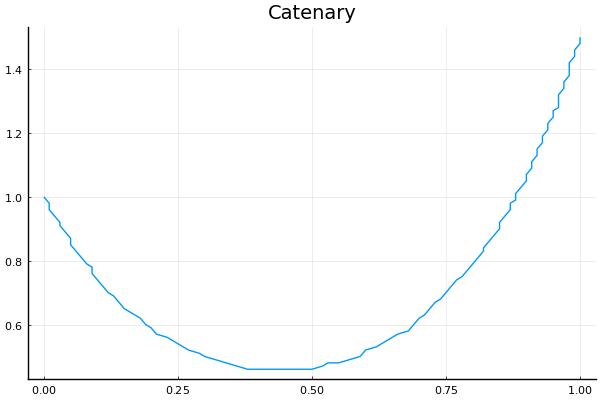

In [28]:
using Plots
pyplot()
plot(s_x, s_y, title="Catenary", legend=false)